In [1]:
import pandas as pd
import numpy as np

In [28]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

In [2]:
submit = pd.read_csv('sub.csv')

In [4]:
df_test = pd.read_csv('data/test.txt', sep='\t')

In [6]:
count = df_test['response'].apply(lambda x: '<second_speaker>' in x)

In [9]:
submit['count'] = count

In [16]:
submit.loc[submit['count'] == True,'human-generated'] = -1

In [17]:
submit.drop(['count'], axis=1).to_csv('sub_exp.csv', index=False)

In [18]:
df_validate = pd.read_csv('data/validation.txt', sep='\t')

In [24]:
df_validate[df_validate['id'] == 524333].context.values

array([ "<first_speaker> di@@ al@@ up internet acce@@ ss for ir@@ an now on the wi@@ ki <url> ir@@ an@@ ele@@ ction <number> ba@@ h@@ man fe@@ b@@ 1@@ 4 <second_speaker> <at> still down . <url> di@@ al@@ up ir@@ an@@ ele@@ ction <first_speaker> <at> yes , once the wi@@ ki is back up top pri@@ ority is a resi@@ li@@ ent mir@@ ror or similar al@@ ter@@ n@@ ative . i 'd like less se@@ ver ad@@ min tin@@ k@@ ering too . <second_speaker> <at> who 's the one to talk to about that ? provi@@ ding mir@@ r@@ ors ser@@ ver space shouldn 't be a problem . i can help , others too . <first_speaker> <at> suggest talking to <at> about helping , they like to hang in ir@@ c - <url> <second_speaker> <at> just for the record they have secur@@ ity concer@@ ns & i 'm not sure if they really under@@ stood what i wanted to offer ."], dtype=object)

In [25]:
df_validate[df_validate['id'] == 524333]

,id,context,response,human-generated
524333,524333,<first_speaker> di@@ al@@ up internet acce@@ s...,<first_speaker> <at> thank you !,0


In [27]:
df_validate['responce_len'] = df_validate.response.apply(lambda x: len(x))

In [34]:
df_validate['dogs_count'] = df_validate.response.apply(lambda x: x.count('@'))

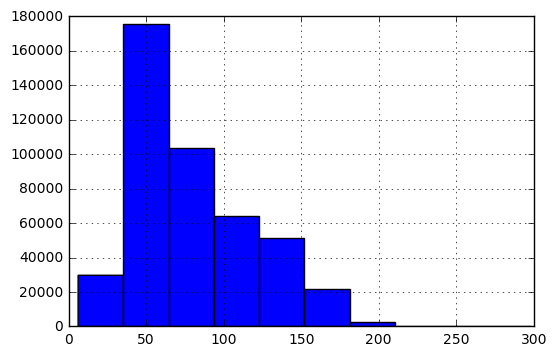

In [33]:
df_validate[(df_validate['human-generated'] == 0) & (df_validate['responce_len'] < 300)].responce_len.hist()

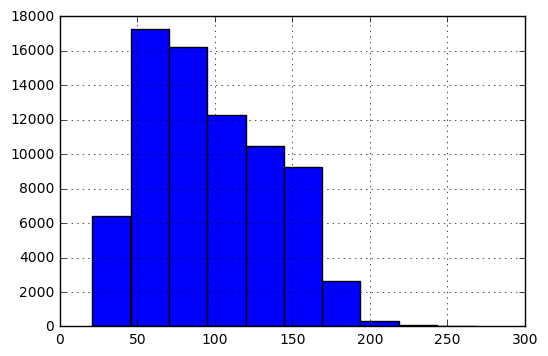

In [32]:
df_validate[df_validate['human-generated'] == 1].responce_len.hist()

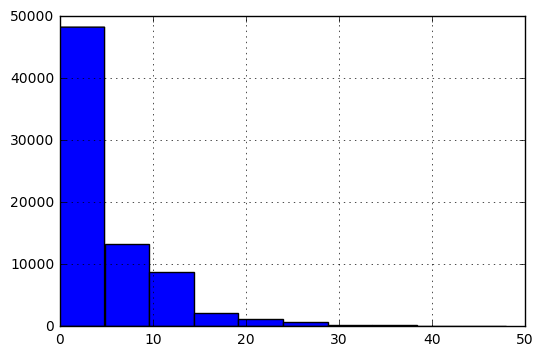

In [38]:
df_validate[(df_validate['human-generated'] == 1) & (df_validate['dogs_count'] < 50)].dogs_count.hist()

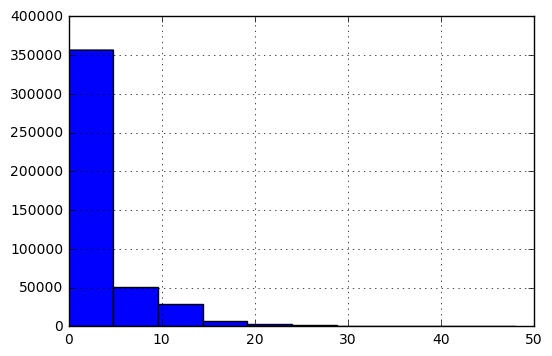

In [39]:
df_validate[(df_validate['human-generated'] == 0) & (df_validate['dogs_count'] < 50)].dogs_count.hist()

### Спикеры

In [55]:
df_validate['context_has_first'] = df_validate.context.apply(lambda x: 'first_speaker' in x)
df_validate['context_has_second'] = df_validate.context.apply(lambda x: 'second_speaker' in x)
df_validate['context_has_third'] = df_validate.context.apply(lambda x: 'third_speaker' in x)

df_validate['response_has_first'] = df_validate.response.apply(lambda x: 'first_speaker' in x)
df_validate['response_has_second'] = df_validate.response.apply(lambda x: 'second_speaker' in x)
df_validate['response_has_third'] = df_validate.response.apply(lambda x: 'third_speaker' in x)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(token_pattern=r'\S+', ngram_range=(1, 3), min_df=10, binary=True, dtype=np.uint8)

In [42]:
X = cv.fit_transform(df_validate.response)

In [44]:
X.shape

(524342, 147870)

In [45]:
import scipy.sparse as sp

In [56]:
X_new = sp.hstack((X, df_validate['context_has_first'].values[:,None], df_validate['context_has_second'].values[:,None]))

In [57]:
X_new.shape

(524342, 147872)